# Ça sent la frite par ici

In [68]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

## I love pickles

In [44]:
df_actors = pd.read_pickle('../data/generated/preprocessed/characters.pkl')
df_movies = pd.read_pickle('../data/generated/preprocessed/movies.pkl')
actor_graph_unfiltered = nx.read_edgelist('../data/generated/graph/actor_graph_unfiltered_bymovie.edgelist.gz')

In [45]:
df_actors.actor_nationality.unique()

array(['United States of America', 'Canada', nan, 'United Kingdom',
       'Norway', 'Germany', 'Japan', 'Turkey', 'Italy', 'Soviet Union',
       'Kingdom of Italy', 'India', "People's Republic of China",
       'South Korea', 'Spain', 'Argentina', 'South Africa', 'Namibia',
       'Republic of Ireland', 'France', 'Venezuela', 'Poland', 'Denmark',
       'Sweden', 'Mexico', 'Pakistan', 'Serbia',
       'Kingdom of the Netherlands', 'Austria', 'Australia',
       'Dominican Republic', 'Taiwan', 'Croatia', 'Belgium',
       'Philippines', 'Romania', 'Greece', 'New Zealand', 'Chile',
       'England', 'North Macedonia', 'Iran', 'Bosnia and Herzegovina',
       'Portugal', 'Russia', 'Brazil', 'Thailand', 'Egypt', 'Malaysia',
       'Czech Republic', 'Scotland', 'Puerto Rico', 'British Hong Kong',
       'Sri Lanka', 'Kingdom of Bavaria', 'Finland', 'Hungary',
       'Mexicana', 'Hong Kong', 'Switzerland', 'Algeria', 'British Raj',
       'Nigeria', 'Cambodia', 'Israel', 'Czechoslovakia',


## T'es belge ou t'es pas belge ?

Maar allé zeg

In [61]:
df_belgian_actors = df_actors[df_actors.actor_nationality == 'Belgium'].dropna(subset='fb_actor_id')
df_belgian_actors

,wiki_id,fb_movie_id,release,character_name,actor_birth,actor_gender,actor_height,ethnicity,actor_name,actor_age,fb_char_id,fb_actor_id,actor_nationality
1323,24320836,/m/07s90cc,1938-10-27,NaN,1904-06-14,M,NaN,NaN,Raymond Rouleau,34.0,/m/09j2shp,/m/05mtt68,Belgium
3205,28992007,/m/0dgn19h,2010-05-18,NaN,1977-08-28,F,NaN,NaN,Christelle Cornil,32.0,/m/0gbqj_p,/m/0bv4pvx,Belgium
3540,8167343,/m/026t_yt,1983,NaN,1938-12-06,M,1.91,NaN,Patrick Bauchau,44.0,/m/02vbm19,/m/06f0cl,Belgium
5204,24889160,/m/09gn4r2,1989,NaN,NaN,NaN,NaN,NaN,Bien De Moor,NaN,/m/0bv9x2s,/m/0bv9x2q,Belgium
5861,22643296,/m/05zpxsc,1919-10-31,Mannequin,1896,F,NaN,NaN,Yvonne George,NaN,/m/0mzdjbw,/m/03yn5jz,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448837,3342063,/m/096rvd,1996-10-16,Igor,1981-01-06,M,1.73,NaN,Jérémie Renier,15.0,/m/0j_qhv,/m/0gqt7h,Belgium
448838,3342063,/m/096rvd,1996-10-16,Roger,1963-07-22,M,NaN,NaN,Olivier Gourmet,33.0,/m/0j_qh_,/m/0668qk,Belgium
448845,3342063,/m/096rvd,1996-10-16,NaN,NaN,M,NaN,NaN,Jean-Michel Balthazar,NaN,/m/0gj6_b4,/m/0gj6_b7,Belgium
449635,18501121,/m/04dz2ww,1931-01-23,NaN,1888-08-05,M,NaN,NaN,Victor Francen,NaN,/m/05nsmbk,/m/027fmr_,Belgium


In [84]:
# all belgian actors have a name ! we truely live in a society...
assert not any(df_belgian_actors.actor_name.isna())

In [133]:
# we lose quite a few actors since many belgian actors are connected to only non-belgian actors
# therefore iels se font tej mdr
belgian_graph = actor_graph_unfiltered.subgraph(df_belgian_actors.fb_actor_id).copy()
belgian_graph.number_of_nodes(), belgian_graph.number_of_edges()

(230, 506)

In [135]:
# filter out self-loops and isolated nodes
belgian_graph.remove_edges_from(nx.selfloop_edges(belgian_graph))
belgian_graph.remove_nodes_from(list(nx.isolates(belgian_graph)))

In [136]:
belgian_graph_names = nx.relabel_nodes(belgian_graph, dict((row.fb_actor_id, row.actor_name) for _, row in df_belgian_actors.iterrows()))

In [137]:
nx.nx_pydot.write_dot(belgian_graph_names, '../data/generated/graph/actor_graph_belgian_bymovie.dot')

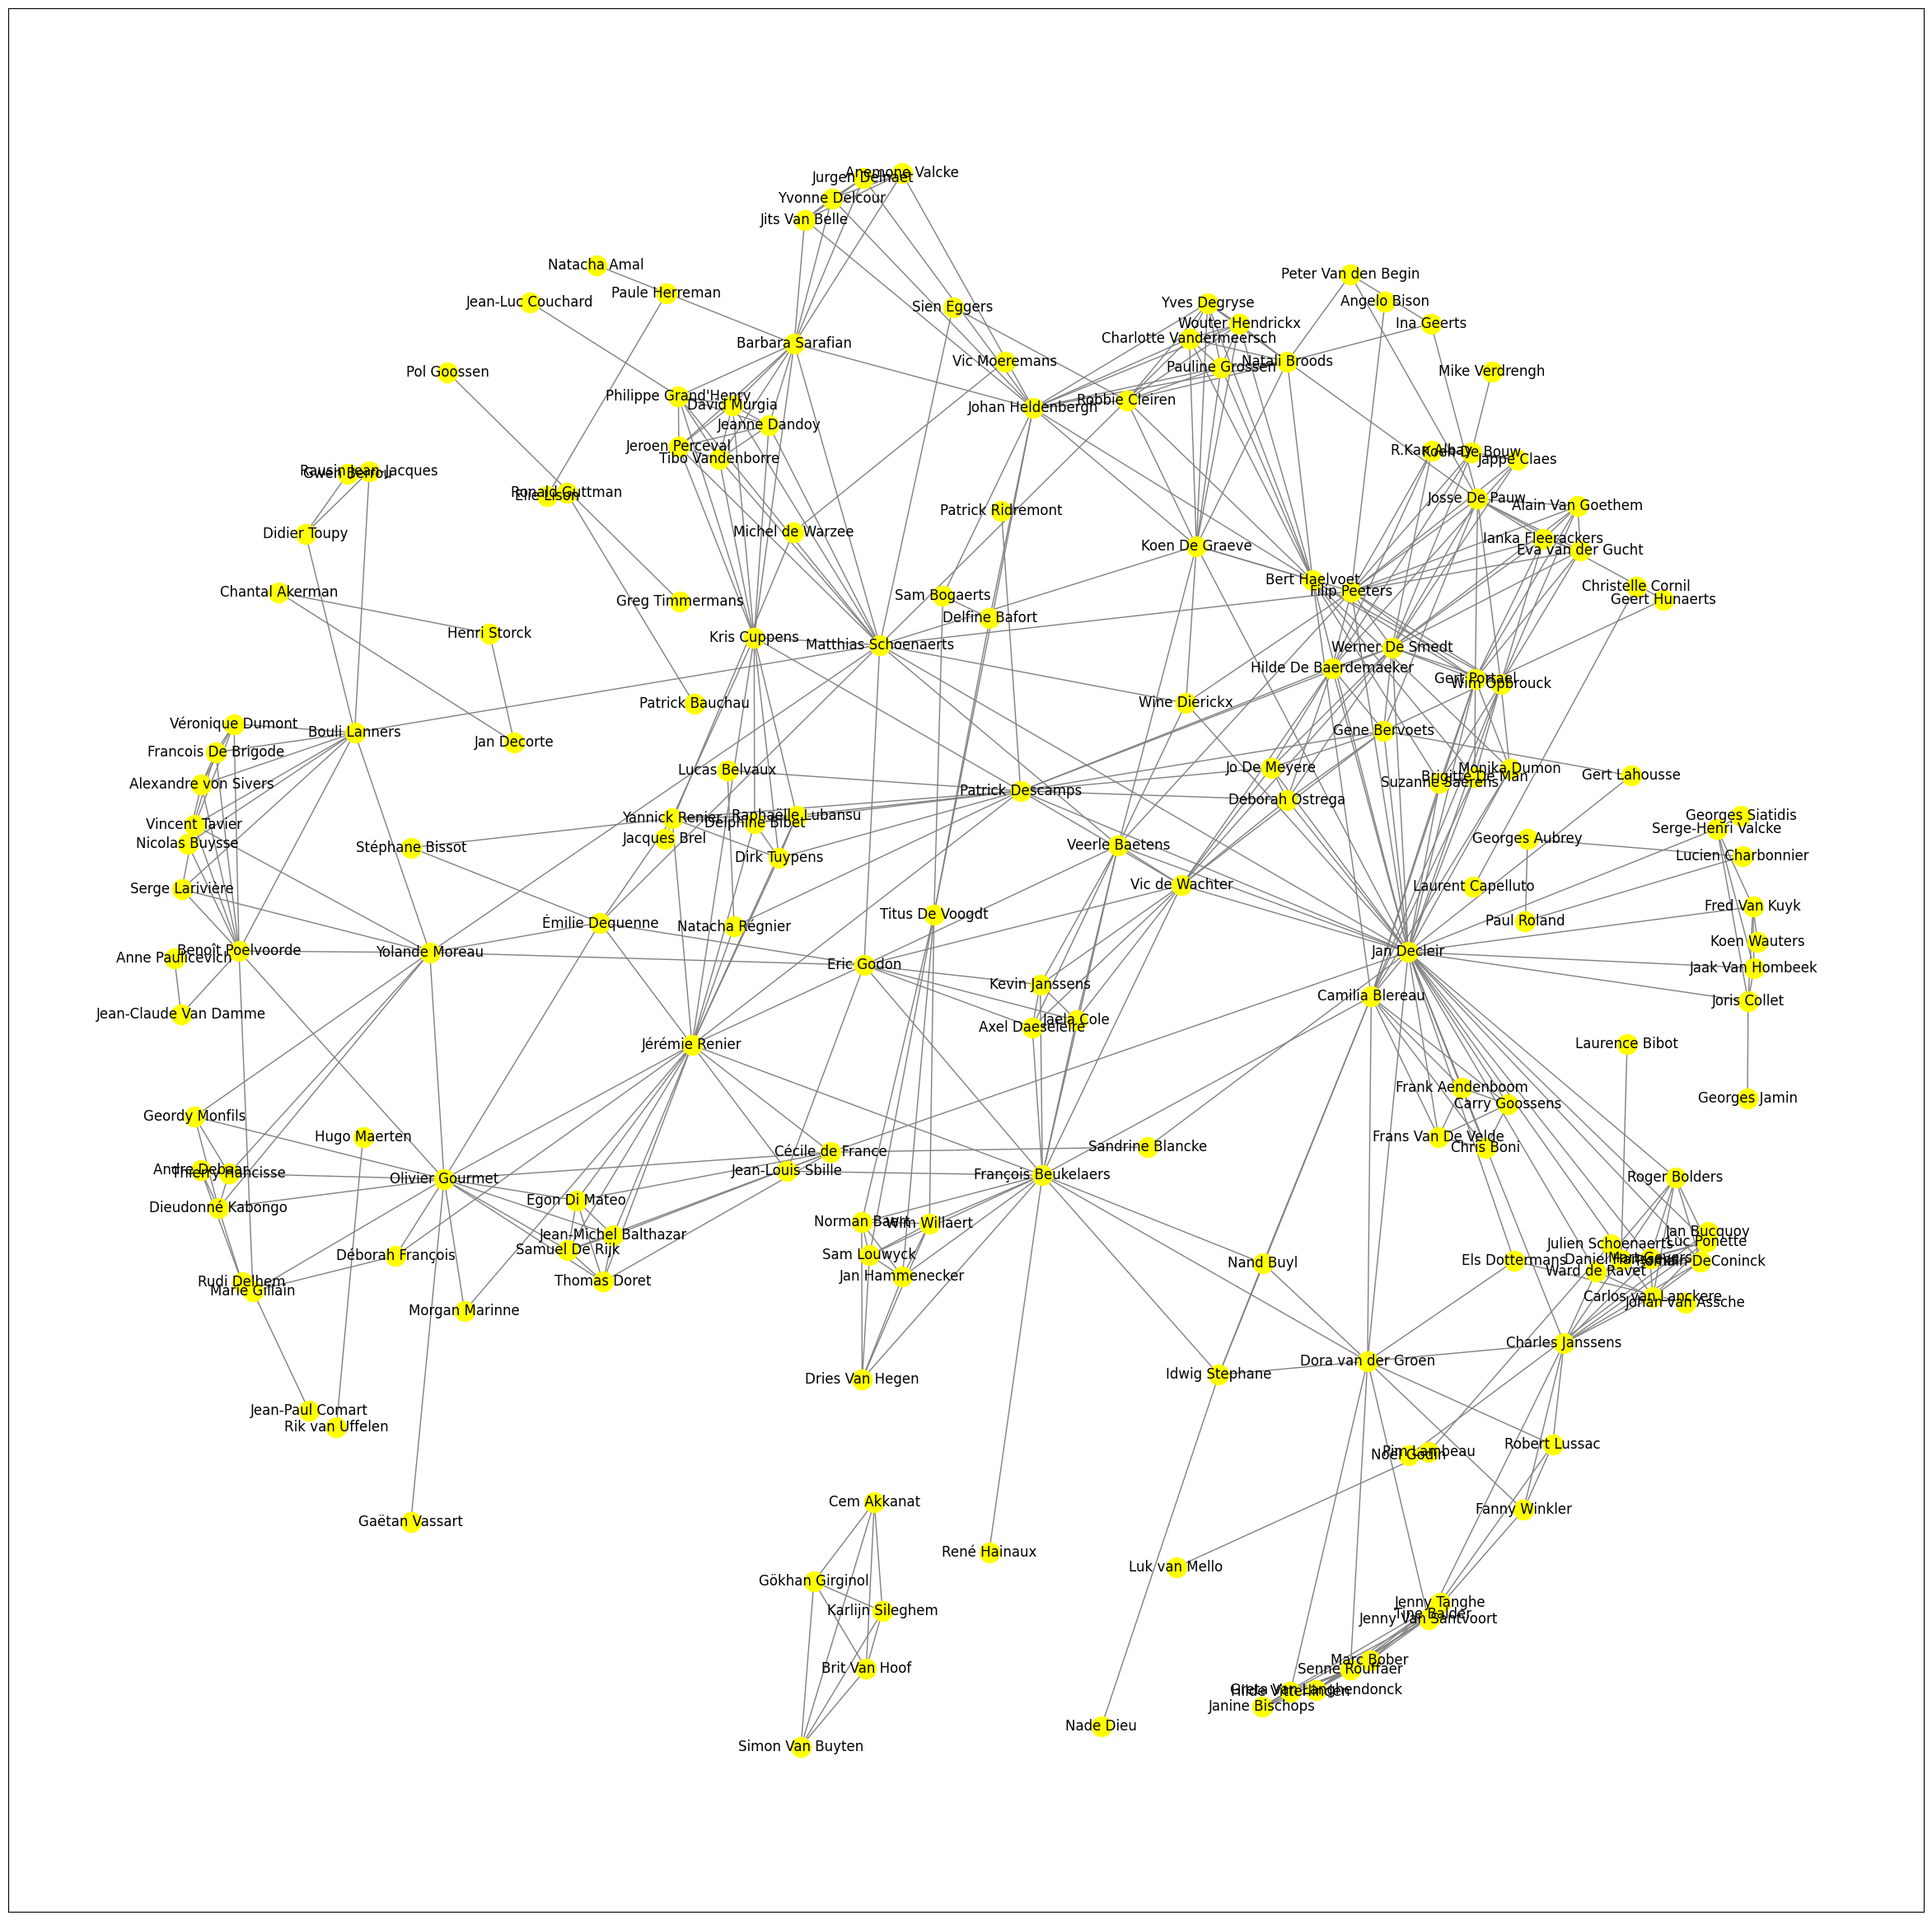

In [184]:
fig, ax = plt.subplots(figsize=(30,30))
# pos = nx.spring_layout(
# 	belgian_graph_names,
# 	iterations=1000,
# 	seed=0,
# 	threshold=0.000001,
# 	# scale=0.2,
# 	k=5
# )
pos = nx.kamada_kawai_layout(
	belgian_graph_names
)
pos = nx.spring_layout(
	belgian_graph_names,
	pos=pos,
	iterations=1000,
	threshold=0,
	k=10,
)
nx.draw_networkx(belgian_graph_names, ax=ax, pos=pos, node_color='yellow', edge_color='gray')